# **Proyecto de la Empresa de Telecomunicaciones Opaco-Perú**

# **Realizado por: Carlos Valladares**

La empresa de telecomunicaciones Opaco ha solicitado realizar un análisis para explicar el negocio de ventas de equipo móviles de acuerdo a su base de datos generada en el mes de Octubre de 2021.



## 1.Cargando librerías y base de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/DSRP_DBA_PYTHON_1_2025/Proyecto_Final/1.Base_proyecto.xlsx')

## 2.Descripción General de los Datos, Explorando Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19552 entries, 0 to 19551
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Periodo       19552 non-null  int64  
 1   Dia           19552 non-null  int64  
 2   EquipoSim     19552 non-null  object 
 3   Tipo          19552 non-null  object 
 4   Subtipo       19552 non-null  object 
 5   Marca         19552 non-null  object 
 6   Gama          19552 non-null  object 
 7   Precio        0 non-null      float64
 8   Ingreso       19552 non-null  float64
 9   Costo         19552 non-null  float64
 10  Margen        1 non-null      object 
 11  Rentabilidad  0 non-null      float64
 12  Tipo Venta    19552 non-null  object 
 13  CanalVenta    19551 non-null  object 
 14  CadenaDealer  16243 non-null  object 
 15  Departamento  19404 non-null  object 
 16  Canal         19552 non-null  object 
 17  SubCanal      19552 non-null  object 
 18  Cluster       19404 non-nu

In [ ]:
df.head()

,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Precio,Ingreso,Costo,Margen,Rentabilidad,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
0,202110,13,Equipo,Celular,Smartphone,ZTE,1. Low,NaN,173.03390,192.39,NaN,NaN,Porta,GRANDES TIENDAS,TOTTUS,LIMA,Retail,GRANDES TIENDAS,Cluster A
1,202110,27,Equipo,Celular,Smartphone,Samsung,2. Entry Smart,NaN,355.22030,338.88,NaN,NaN,VR,GRANDES TIENDAS,PLAZAVEA,JUNIN,Retail,GRANDES TIENDAS,Cluster B
2,202110,21,Equipo,Celular,Smartphone,Xiaomi,3. Mid,NaN,725.38980,769.94,NaN,NaN,Porta,GRANDES TIENDAS,OECHSLE,LAMBAYEQUE,Retail,GRANDES TIENDAS,Cluster B
3,202110,17,Equipo,Celular,Smartphone,Bmobile,1. Low,NaN,56.23729,35.41,NaN,NaN,VR,GRANDES TIENDAS,PLAZAVEA,ICA,Retail,GRANDES TIENDAS,Cluster A
4,202110,26,Equipo,Celular,Smartphone,Bmobile,1. Low,NaN,49.70339,34.85,NaN,NaN,Porta,GRANDES TIENDAS,METRO,LIMA,Retail,GRANDES TIENDAS,Cluster A


In [ ]:
filas, columnas = df.shape
print(f"Filas: {filas}")
print(f"Columnas: {columnas}")

Filas: 19552
Columnas: 19


In [ ]:
df.dtypes

,0
Periodo,int64
Dia,int64
EquipoSim,object
Tipo,object
Subtipo,object
Marca,object
Gama,object
Precio,float64
Ingreso,float64
Costo,float64


In [ ]:
df.dtypes.value_counts()

,count
object,13
float64,4
int64,2


## 3.Limpieza y Transformación

### 3.1.Analisis de valores faltantes

In [ ]:
df.isnull()

,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Precio,Ingreso,Costo,Margen,Rentabilidad,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
0,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19547,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
19548,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
19549,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
19550,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False


In [ ]:
df.isnull().any()

,0
Periodo,False
Dia,False
EquipoSim,False
Tipo,False
Subtipo,False
Marca,False
Gama,False
Precio,True
Ingreso,False
Costo,False


In [ ]:
df.isnull().sum()

,0
Periodo,0
Dia,0
EquipoSim,0
Tipo,0
Subtipo,0
Marca,0
Gama,0
Precio,19552
Ingreso,0
Costo,0


In [ ]:
df.isnull().sum().sum()

62261

#### 3.1.1.Distribución de valores nulos

In [ ]:
df_nulos = df.isnull().melt()

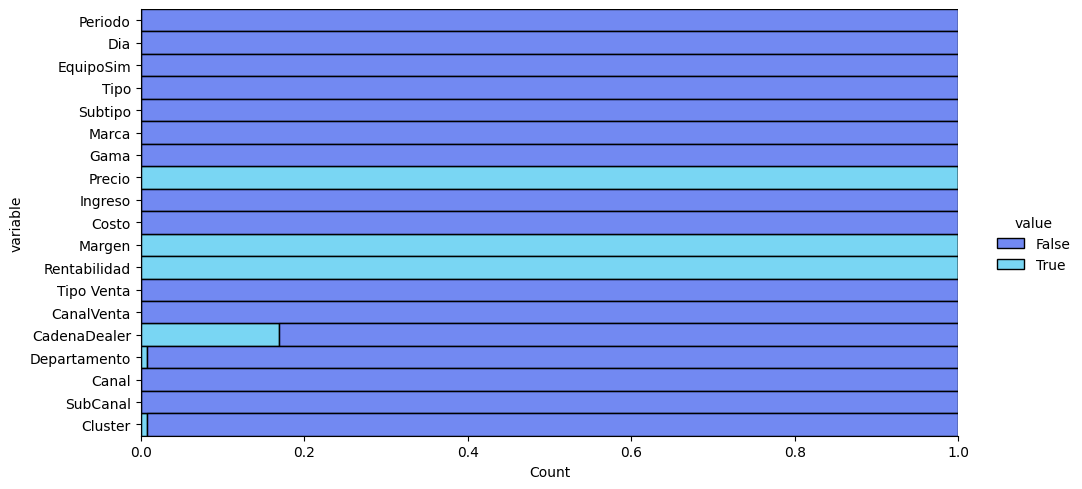

In [ ]:
palette = ["#4361EE", "#4CC9F0"]
sns.displot(
    data=df_nulos,
    y='variable',
    hue='value',
    multiple='fill',
    aspect=2,
    palette=palette
)
plt.show()

Comentario 1: De acuerdo al analisis de datos faltantes, podemos tomar las siguientes accciones:


*   La columna Precio rellenarla con valores ceros (0)
*   Las columnas Margen y Rentabilidad calcularlas a partir de las columnas Ingreso y Costo
*   La columnas CadenaDealer será rellenadas con valores "Desconocido".
*   El valor nulo de la columna CanalVenta será eliminado por ser no significativo para el estudio, al igual que los valores nulos de Departamento y Cluster.





### 3.2.Manipulando Columna Precio

In [ ]:
df['Precio'] = df['Precio'].fillna(0)

### 3.3.Calculo de Margen y Rentabilidad y redondeo de cifras

In [ ]:
df['Ingreso'] = df['Ingreso'].round(2)
df['Costo'] = df['Costo'].round(2)

In [ ]:
df['Margen'] = (df['Ingreso']-df['Costo']).round(2)

In [ ]:
df['Rentabilidad'] = ((df['Margen']/df['Ingreso'])*100).round(2)

### 3.4.Manipulando columna CanalVenta

In [ ]:
df['CanalVenta'].isnull().sum()

1

In [ ]:
df = df.dropna(subset=['CanalVenta'])

### 3.5.Manipulando la columna CadenaDealer

In [ ]:
df['CadenaDealer'].isnull().sum()

3308

In [ ]:
df['CadenaDealer'] = df['CadenaDealer'].fillna('Desconocido')

### 3.6.Manipulando Columna Departamento

In [ ]:
df['Departamento'].isnull().sum()

148

In [ ]:
df = df.dropna(subset=['Departamento'])

### 3.7.Manipulando Columna Cluster

In [ ]:
df['Cluster'].isnull().sum()

0

In [ ]:
df = df.dropna(subset=['Cluster'])

### 3.8.Verificando que los datos esten completos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19403 entries, 0 to 19551
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Periodo       19403 non-null  int64  
 1   Dia           19403 non-null  int64  
 2   EquipoSim     19403 non-null  object 
 3   Tipo          19403 non-null  object 
 4   Subtipo       19403 non-null  object 
 5   Marca         19403 non-null  object 
 6   Gama          19403 non-null  object 
 7   Precio        19403 non-null  float64
 8   Ingreso       19403 non-null  float64
 9   Costo         19403 non-null  float64
 10  Margen        19403 non-null  float64
 11  Rentabilidad  19403 non-null  float64
 12  Tipo Venta    19403 non-null  object 
 13  CanalVenta    19403 non-null  object 
 14  CadenaDealer  19403 non-null  object 
 15  Departamento  19403 non-null  object 
 16  Canal         19403 non-null  object 
 17  SubCanal      19403 non-null  object 
 18  Cluster       19403 non-null  o

In [ ]:
df.head()

,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Precio,Ingreso,Costo,Margen,Rentabilidad,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
0,202110,13,Equipo,Celular,Smartphone,ZTE,1. Low,0.0,173.03,192.39,-19.36,-11.19,Porta,GRANDES TIENDAS,TOTTUS,LIMA,Retail,GRANDES TIENDAS,Cluster A
1,202110,27,Equipo,Celular,Smartphone,Samsung,2. Entry Smart,0.0,355.22,338.88,16.34,4.60,VR,GRANDES TIENDAS,PLAZAVEA,JUNIN,Retail,GRANDES TIENDAS,Cluster B
2,202110,21,Equipo,Celular,Smartphone,Xiaomi,3. Mid,0.0,725.39,769.94,-44.55,-6.14,Porta,GRANDES TIENDAS,OECHSLE,LAMBAYEQUE,Retail,GRANDES TIENDAS,Cluster B
3,202110,17,Equipo,Celular,Smartphone,Bmobile,1. Low,0.0,56.24,35.41,20.83,37.04,VR,GRANDES TIENDAS,PLAZAVEA,ICA,Retail,GRANDES TIENDAS,Cluster A
4,202110,26,Equipo,Celular,Smartphone,Bmobile,1. Low,0.0,49.70,34.85,14.85,29.88,Porta,GRANDES TIENDAS,METRO,LIMA,Retail,GRANDES TIENDAS,Cluster A


### 3.9.Revisión de cada variable categórica

In [ ]:
valores_unicos = df['EquipoSim'].value_counts()
print(valores_unicos)

EquipoSim
Equipo    19403
Name: count, dtype: int64


In [ ]:
valores_unicos = df['Tipo'].value_counts()
print(valores_unicos)

Tipo
Celular    19345
celular       58
Name: count, dtype: int64


#### 3.9.1.Manipulación de la variable categórica Tipo

In [ ]:
df['Tipo'] = df['Tipo'].replace({'celular': 'Celular'})

In [ ]:
valores_unicos = df['Subtipo'].value_counts()
print(valores_unicos)

Subtipo
Smartphone    19215
Feature         130
smartphone       58
Name: count, dtype: int64


#### 3.9.2.Manipulación de la variable categórica Subtipo

In [ ]:
df['Subtipo'] = df['Subtipo'].replace({'smartphone': 'Smartphone'})

In [ ]:
valores_unicos = df['Marca'].value_counts()
print(valores_unicos)

Marca
Bmobile     4539
Motorola    4240
Samsung     3592
Xiaomi      3352
ZTE         2869
POCO         241
Alcatel      178
Vivo         121
Azumi         68
Nokia         57
Realme        55
EKS           50
Apple         32
LG             7
Huawei         2
Name: count, dtype: int64


In [ ]:
valores_unicos = df['Gama'].value_counts()
print(valores_unicos)

Gama
1. Low            6504
2. Entry Smart    6423
3. Mid            5893
4. High            560
5. Premium          23
Name: count, dtype: int64


In [ ]:
valores_unicos = df['Tipo Venta'].value_counts()
print(valores_unicos)

Tipo Venta
Reno     10202
Porta     6760
VR        2441
Name: count, dtype: int64


In [ ]:
valores_unicos = df['CanalVenta'].value_counts()
print(valores_unicos)

CanalVenta
GRANDES TIENDAS                  13449
ISLAS                             2942
TIENDAS PROPIAS FRANQUICIADAS     2160
GRANDES TIENDAS ESPECIALISTAS      302
TIENDAS PROPIAS                    292
MAYORISTAS                         132
Otros                               76
Tiendas                             45
CONECTA PLUS                         4
S2S                                  1
Name: count, dtype: int64


In [ ]:
valores_unicos = df['CadenaDealer'].value_counts()
print(valores_unicos)

CadenaDealer
Desconocido      3182
ISLA             1795
PLAZAVEA         1766
TOTTUS           1497
TPF               788
                 ... 
EXTJMART1-IS        1
EXTHPINED-IS        1
EXTJBALD3-IS        1
LQUISPEV-TE         1
IS_OPHUANCAYO       1
Name: count, Length: 468, dtype: int64


In [ ]:
valores_unicos = df['Departamento'].value_counts()
print(valores_unicos)

Departamento
LIMA             10334
PIURA             1453
LA LIBERTAD       1253
LAMBAYEQUE        1199
ICA                971
AREQUIPA           784
UCAYALI            559
JUNIN              506
ANCASH             488
CAJAMARCA          367
HUANUCO            328
PUNO               303
CUSCO              211
SAN MARTIN         149
TACNA              144
TUMBES             123
MOQUEGUA            84
LORETO              45
AYACUCHO            20
AMAZONAS            18
HUANCAVELICA        18
PASCO               16
MADRE DE DIOS       15
APURIMAC            15
Name: count, dtype: int64


In [ ]:
valores_unicos = df['Canal'].value_counts()
print(valores_unicos)

Canal
Retail     13751
ISLAS       2942
Tiendas     2497
Otros        213
Name: count, dtype: int64


In [ ]:
valores_unicos = df['SubCanal'].value_counts()
print(valores_unicos)

SubCanal
GRANDES TIENDAS                  13449
ISLAS                             2942
TIENDAS PROPIAS FRANQUICIADAS     2160
GRANDES TIENDAS ESPECIALISTAS      302
TIENDAS PROPIAS                    292
Mayoristas                         132
Otros                               76
Tiendas Propias                     45
Conecta Plus                         4
S2S                                  1
Name: count, dtype: int64


#### 3.9.3.Eliminación de la variable categórica SubCanal por duplicidad con la variable categórica CanalVenta

In [ ]:
df = df.drop('SubCanal', axis=1)

In [ ]:
valores_unicos = df['Cluster'].value_counts()
print(valores_unicos)

Cluster
Cluster A    11793
Cluster B     5318
Cluster C     2292
Name: count, dtype: int64


## 4.Estadistica Descriptiva de Variables

### 4.1.E.Descriptivas de las variables numéricas

In [ ]:
df[['Precio', 'Ingreso','Costo','Margen','Rentabilidad']].describe().round(2)

,Precio,Ingreso,Costo,Margen,Rentabilidad
count,19403.0,19403.00,19403.00,19403.00,19403.00
mean,0.0,333.39,351.10,-17.71,-2.12
std,0.0,243.37,252.26,70.22,96.39
min,0.0,7.12,27.97,-1379.88,-5584.41
25%,0.0,141.66,157.06,-50.88,-13.97
50%,0.0,298.27,338.10,-13.17,-4.14
75%,0.0,471.85,539.66,21.50,17.48
max,0.0,4177.93,4271.58,1125.12,95.98


### 4.2.Distribución de los Ingresos

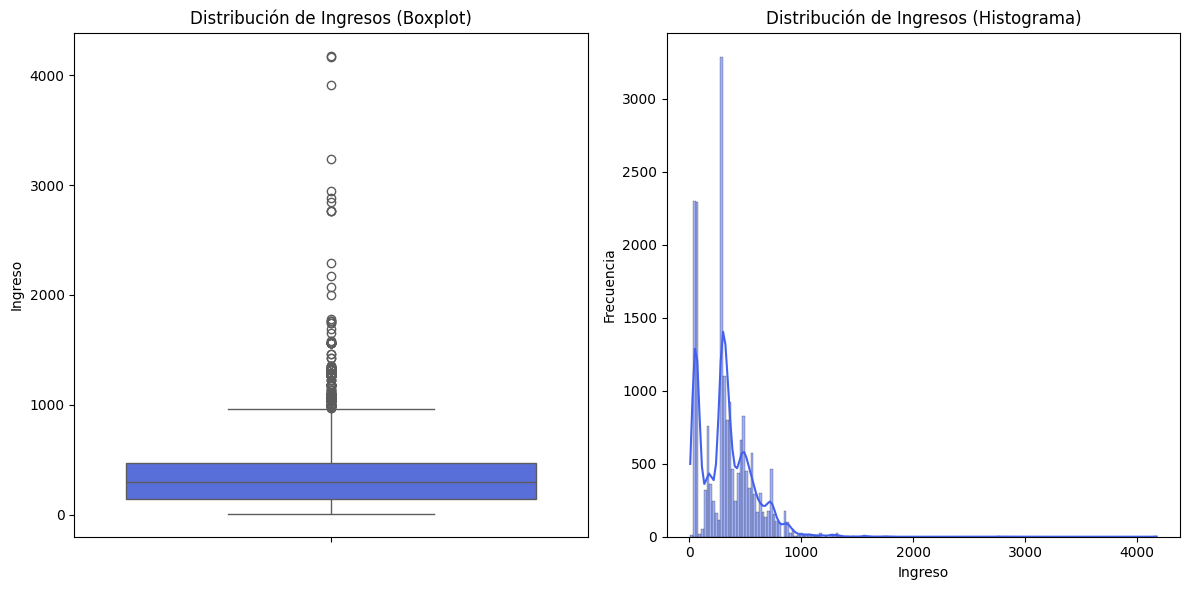

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Ingreso'],
            color="#4361EE")
plt.title('Distribución de Ingresos (Boxplot)')
plt.ylabel('Ingreso')

plt.subplot(1, 2, 2)
sns.histplot(df['Ingreso'],
             kde=True,
             color="#4361EE")
plt.title('Distribución de Ingresos (Histograma)')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


#### 4.2.1.Ingresos mayores a 1000 Soles por Gama y Marca

In [ ]:
ingresos_mayores_1000 = df[(df['Ingreso'] > 1000)]

ingreso_1000 = ingresos_mayores_1000.groupby(['Gama', 'Marca'])['Ingreso'].count()

ingreso_1000



Gama        Marca   
1. Low      Bmobile      1
3. Mid      Motorola     1
            Realme       2
            Xiaomi       1
4. High     Apple       12
            Motorola    13
            Realme       9
            Samsung     84
            Xiaomi      63
5. Premium  Apple        8
            Motorola     1
            Samsung      8
            Xiaomi       5
Name: Ingreso, dtype: int64

#### 4.2.2.Ingresos menores de 10 Soles por Tipo de Venta, Gama y Marca

In [ ]:
ingresos_menores_10 = df[(df['Ingreso'] < 10)]

ingreso_10 = ingresos_menores_10.groupby(['Tipo Venta', 'Gama', 'Marca'])['Ingreso'].count()

ingreso_10

Tipo Venta  Gama            Marca   
Porta       1. Low          Bmobile     1
VR          2. Entry Smart  Motorola    1
            3. Mid          ZTE         1
Name: Ingreso, dtype: int64

### 4.3.Distribución del Margen y la Rentabilidad

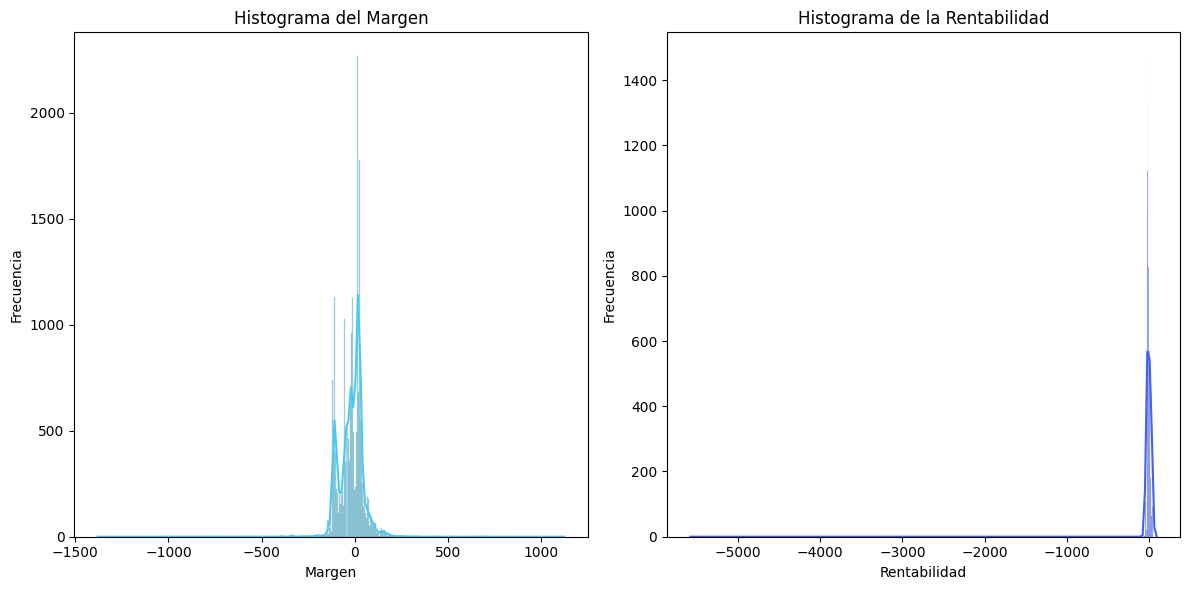

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Margen'],
             kde=True,
             color='#4CC9F0')
plt.title('Histograma del Margen')
plt.xlabel('Margen')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df['Rentabilidad'],
             kde=True,
             color='#4361EE')
plt.title('Histograma de la Rentabilidad')
plt.xlabel('Rentabilidad')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#### 4.3.1.Tabla de conteo de valores de margen negativo

In [ ]:
total_valores = len(df['Margen'])
conteo_valores_negativos_margen = len(df[df['Margen'] < 0])
valores_negativos_margen_porcentaje = (conteo_valores_negativos_margen / total_valores) * 100

print(f"Cantidad de ventas realizadas en el período estudiado: {total_valores}")
print(f"Cantidad de valores de margen negativos              : {conteo_valores_negativos_margen}")
print(f"Porcentaje de valores de margen negativos            : {valores_negativos_margen_porcentaje:.2f}%")

Cantidad de ventas realizadas en el período estudiado: 19403
Cantidad de valores de margen negativos              : 10695
Porcentaje de valores de margen negativos            : 55.12%


### 4.4.E.Descriptiva de las variables categóricas

In [ ]:
df.describe(include=object)

,EquipoSim,Tipo,Subtipo,Marca,Gama,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,Cluster
count,19403,19403,19403,19403,19403,19403,19403,19403,19403,19403,19403
unique,1,1,2,15,5,3,10,468,24,4,3
top,Equipo,Celular,Smartphone,Bmobile,1. Low,Reno,GRANDES TIENDAS,Desconocido,LIMA,Retail,Cluster A
freq,19403,19403,19273,4539,6504,10202,13449,3182,10334,13751,11793


Comentario 2. La empresa de telecomunicaciones Opaco muestra una situación financiara complicada según un primer resumen estadístico de sus variables numéricas:

*   La desviación estandar de las variables numéricas (ingreso, costo, margen y rentabilidad) muestra una variabilidad considerable en los ingresos y costos de los registros.
*   El margen promedio es negativo (-17.71), lo que significa que, en general, los costos superan a los ingresos.
*   La rentabilidad también es negativa en promedio (-2.12), lo que indica que, en general, la rentabilidad es baja.
*   El boxplot de los ingresos 4.2 en combinación con la data de la tabla 4.1 de estadisticas descriptivas indican que la mediana es de 298.97 Soles, es decir que el 50% de los ingresos de esta empresa se encuentran por debajo de este valor. Así también, la mayoría de los datos de ingresos se encuentran entre el valor mínimo 7.12 Soles y 1000 Soles.
*   Datos de ingresos por encima de 1000 Soles podrían ser considerados como valores atípicos sin embargo la tabla 4.2.1 muestra que los valores mayores de 1000 Soles corresponden a equipos de Gama Mid, High y Premium en su mayoría.
*   La tabla 4.2.2 muestra que los valores menores a 10 soles pertenecen tipos de venta Porta y VR (venta regular) y si podrían ser considerados como valores atípicos.
*   Dado que la mediana (298.27) está más cerca de Q1 que de Q3, entonces quiere decir que hay un sesgo a la derecha (positivamente sesgada), lo que significa que hay algunos ingresos muy altos que están influyendo en la media. Todo esto queda demostrado con el histograma de ingresos 4.2 el cual muestra una cola larga a la derecha.
*   La altura de las barras en el histograma 4.2 nos indica la cantidad de ventas que se encuentran en diferentes rangos de ingresos, indicando que hay una alta concentración de ventas en los ingresos más bajos y medios (hasta 1000 Soles aproximadamente), y que la frecuencia disminuye en los ingresos más altos.
*   El histograma 4.3 muestra que la mayoría de los valores del margen son negativos y queda confirmado con la información de la tabla 4.3.1 donde el conteo de datos de margen negativo representa el 55.12% del total de datos.








## 5.Evaluación de los volumenes de venta de equipos

### 5.1.Ventas de Equipos por Marca

<ipython-input-45-2aa4c8bdf183>:4: UserWarning: 
The palette list has fewer values (1) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df,


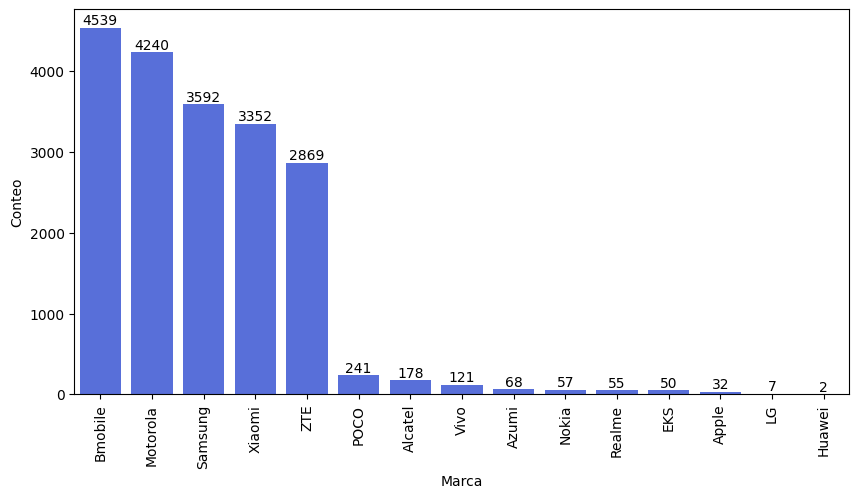

In [ ]:
marca_counts = df['Marca'].value_counts().sort_values(ascending=False)
palette = ["#4361EE"]
plt.figure(figsize=(10, 5))
sns.countplot(data=df,
              x='Marca',
              hue='Marca',
              palette=palette,
              order=marca_counts.index)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                   textcoords='offset points')
plt.xticks(rotation=90)
plt.ylabel('Conteo')
plt.show()

### 5.2.Venta de Equipos por Gama

In [ ]:
gama_percentages = df['Gama'].value_counts(normalize=True) * 100
gama_percentages

,proportion
Gama,
1. Low,33.520590
2. Entry Smart,33.103128
3. Mid,30.371592
4. High,2.886152
5. Premium,0.118538


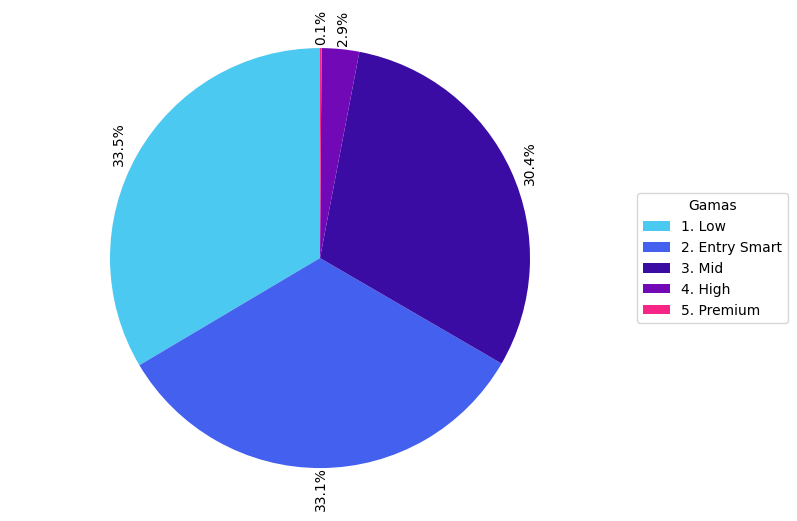

In [ ]:
plt.figure(figsize=(8, 6))
palette = ["#4CC9F0","#4361EE","#3A0CA3","#7209B7","#F72585","#74FC94"]
plt.pie(gama_percentages,
        #labels=gama_percentages.index,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=1.1,
        textprops={'fontsize': 10, 'rotation': 90},
        colors=palette)
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.legend(gama_percentages.index, title="Gamas", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### 5.3.Ventas de Equipos por Gama y Marca

<ipython-input-50-687bc7b79ab6>:3: UserWarning: The palette list has more values (16) than needed (15), which may not be intended.
  sns.stripplot(


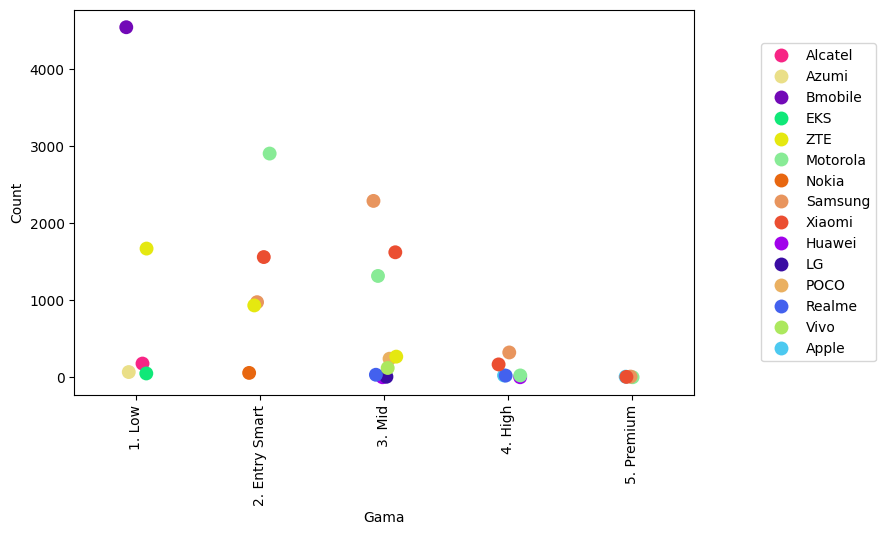

In [ ]:
marca_counts = df.groupby(['Gama', 'Marca']).size().reset_index(name='Count')
palette = ["#F72585", '#EADF88', "#7209B7", '#10E878', '#E5E810', '#88EB96', '#E86710', '#E8955E', '#EB4E31', '#A101EB', "#3A0CA3", '#EAB061', "#4361EE", '#ACE85E', "#4CC9F0", '#A594EB']
plt.figure(figsize=(8, 5))
sns.stripplot(
    data=marca_counts,
    x='Gama',
    y='Count',
    hue='Marca',
    size=10,
    palette=palette)

plt.xticks(rotation=90)
plt.legend(loc='center',bbox_to_anchor=(1.2,0.5))
plt.show()

#### 5.3.1.Marca de Equipos por Gama

In [ ]:
df_marca = df.groupby('Gama')['Marca'].unique()
df_marca

,Marca
Gama,
1. Low,"[ZTE, Bmobile, Alcatel, Azumi, EKS]"
2. Entry Smart,"[Samsung, Motorola, ZTE, Xiaomi, Nokia]"
3. Mid,"[Xiaomi, Motorola, Samsung, ZTE, POCO, Vivo, R..."
4. High,"[Samsung, Xiaomi, Motorola, Realme, Apple, Hua..."
5. Premium,"[Apple, Xiaomi, Samsung, Motorola]"


### 5.4.Ventas de Equipos por Departamento

<ipython-input-51-fdea2b6e7096>:4: UserWarning: 
The palette list has fewer values (1) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df,


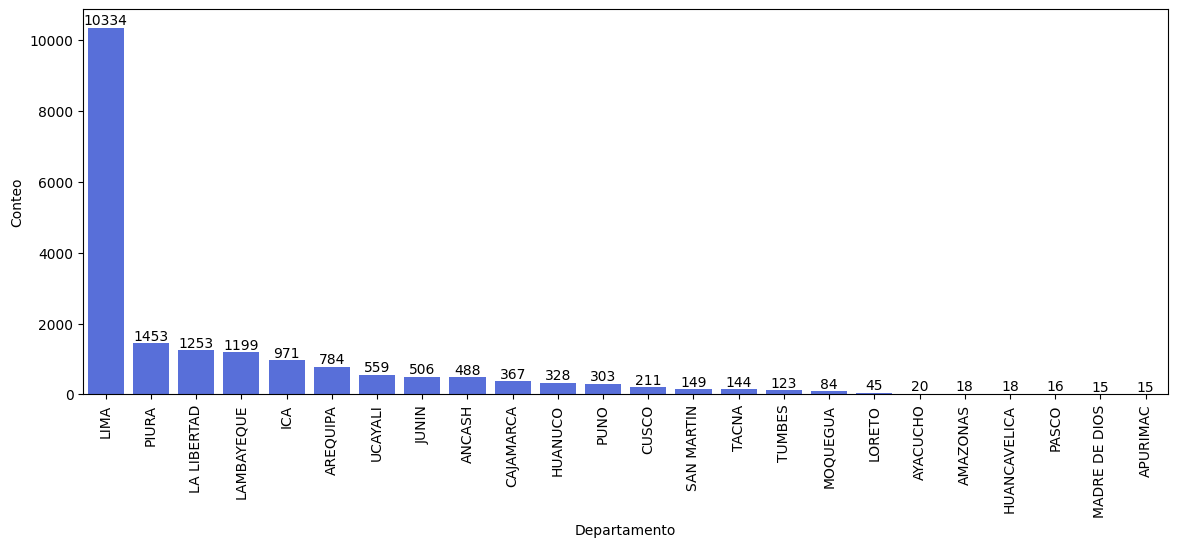

In [ ]:
dpto_counts = df['Departamento'].value_counts().sort_values(ascending=False)
palette = ["#4361EE"]
plt.figure(figsize=(14, 5))
sns.countplot(data=df,
              x='Departamento',
              hue='Departamento',
              palette=palette,
              order=dpto_counts.index)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                   textcoords='offset points')
plt.xticks(rotation=90)
plt.ylabel('Conteo')
plt.show()

### 5.5.Venta de Equipos por Gama y Marca en el Departamento de Lima

<ipython-input-53-3759aaf15965>:3: UserWarning: The palette list has more values (16) than needed (15), which may not be intended.
  sns.stripplot(


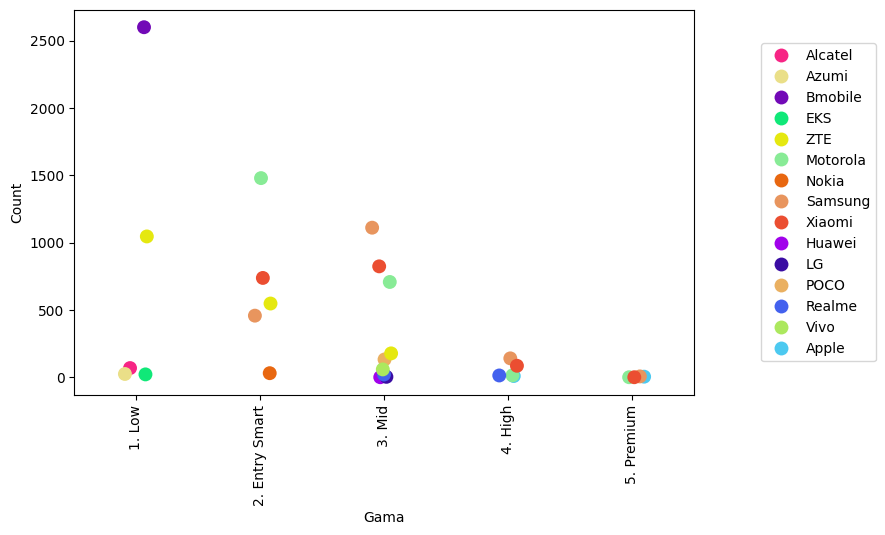

In [ ]:
lima_ventas = df[df['Departamento'] == 'LIMA']

marca_counts_lima = lima_ventas.groupby(['Gama', 'Marca']).size().reset_index(name='Count')

palette = ["#F72585", '#EADF88', "#7209B7", '#10E878', '#E5E810', '#88EB96', '#E86710', '#E8955E', '#EB4E31', '#A101EB', "#3A0CA3", '#EAB061', "#4361EE", '#ACE85E', "#4CC9F0", '#A594EB']
plt.figure(figsize=(8, 5))
sns.stripplot(
    data=marca_counts_lima,
    x='Gama',
    y='Count',
    hue='Marca',
    size=10,
    palette=palette)

plt.xticks(rotation=90)
plt.legend(loc='center',bbox_to_anchor=(1.2,0.5))
plt.show()

Comentario 3.

*   Las cinco marcas de celulares más vendidas por la empresa de telecomunicaciones Opaco en orden descendente son: Bmobile, Motorola, Samsung, Xiaomi y ZTE (ver gráfica 5.1)
*   Mas del 95% de las ventas de celulares realizadas son de Gama Low, Entry Smart y Mid, el resto corresponde a las Gamas High y Premium (ver gráfica 5.2). De la Gama Low, los dos más vendidos son marca Bmobile y ZTE, de la Gama Entry Smart, los dos más vendidos son marca Motorola y Xiaomi y de la Gama Mid, los dos más vendidos son marca Samsung y Xiaomi (ver gráfica 5.3).
*   De las 19.403 ventas realizadas, el Departamento de Lima supera el 50% con un total de 10.334 ventas de celulares, como se muestra en la gráfica 5.4. Mostrando el mismo orden de ventas por Gama y Marca reportados en el inciso anterior em el departamento de Lima (gráfica 5.5).



## 6.Evaluación de las ganancias por venta de equipos

### 6.1.Comportamiento de los Ingresos y Costos

<ipython-input-61-80408a5c5847>:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.lineplot(data=dia_ingresos_costos,


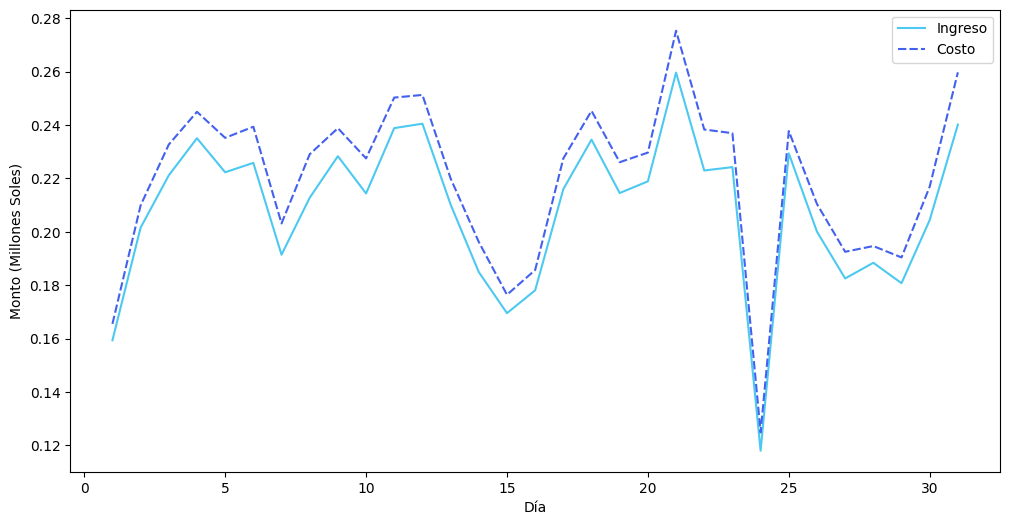

In [ ]:
dia_ingresos_costos = df.groupby('Dia')[['Ingreso', 'Costo']].sum()
dia_ingresos_costos = dia_ingresos_costos / 1000000

palette = ["#4CC9F0","#4361EE","#3A0CA3","#7209B7","#F72585","#74FC94"]

plt.figure(figsize=(12, 6))
sns.lineplot(data=dia_ingresos_costos,
             palette=palette)

plt.xlabel('Día')
plt.ylabel('Monto (Millones Soles)')
plt.xticks(rotation=0)
plt.show()

### 6.2.Ingresos, Costos por Tipo de Venta

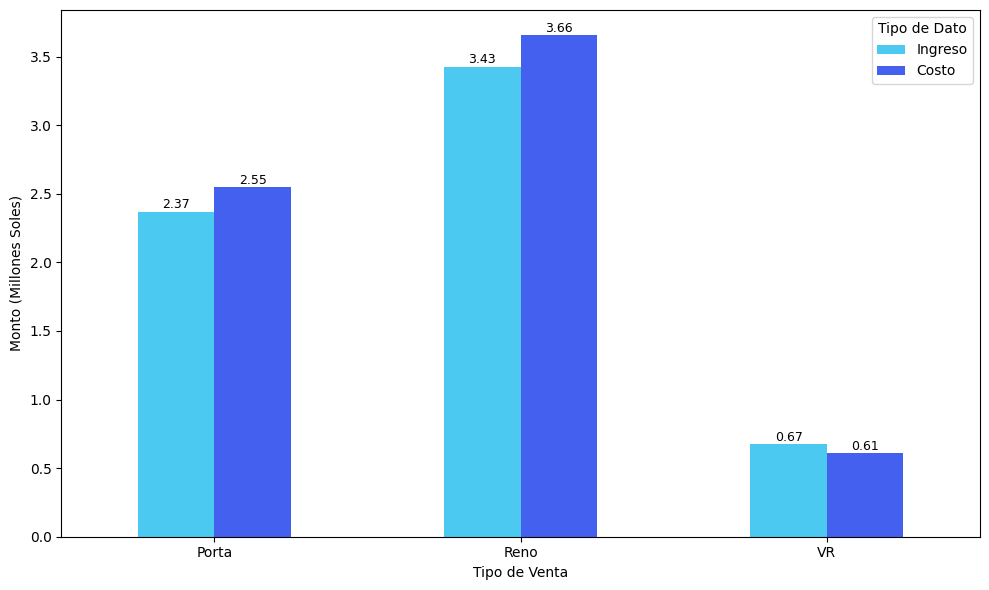

In [ ]:
tipoventa_ingresos_costos = df.groupby('Tipo Venta')[['Ingreso', 'Costo']].sum()
tipoventa_ingresos_costos = tipoventa_ingresos_costos / 1000000

palette = ["#4CC9F0","#4361EE","#3A0CA3","#7209B7","#F72585","#74FC94"]
ax = tipoventa_ingresos_costos.plot(kind='bar',
                                    figsize=(10, 6),
                                    color=palette)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.ylabel('Monto (Millones Soles)')
plt.xlabel('Tipo de Venta')
plt.legend(title='Tipo de Dato')
plt.xticks(rotation=0)
plt.tight_layout() # Ajustar la disposición del gráfico para evitar superposición de elementos.
plt.show()

#### 6.2.1.Tabla de Ingresos, Costos, Margen y Rentabilidad por tipo de venta

In [ ]:
tipoventa_ingresos_costos = df.groupby('Tipo Venta')[['Ingreso', 'Costo']].sum()

tipoventa_ingresos_costos['Margen'] = tipoventa_ingresos_costos['Ingreso'] - tipoventa_ingresos_costos['Costo']
tipoventa_ingresos_costos['Rentabilidad'] = (tipoventa_ingresos_costos['Margen'] / tipoventa_ingresos_costos['Ingreso']) * 100

tipoventa_ingresos_costos = tipoventa_ingresos_costos.round(2)
tipoventa_ingresos_costos


,Ingreso,Costo,Margen,Rentabilidad
Tipo Venta,,,,
Porta,2369515.33,2548040.84,-178525.51,-7.53
Reno,3425746.96,3656861.94,-231114.98,-6.75
VR,673535.78,607498.08,66037.70,9.80


### 6.3.Evaluación de las ganancias de los equipos por Gama

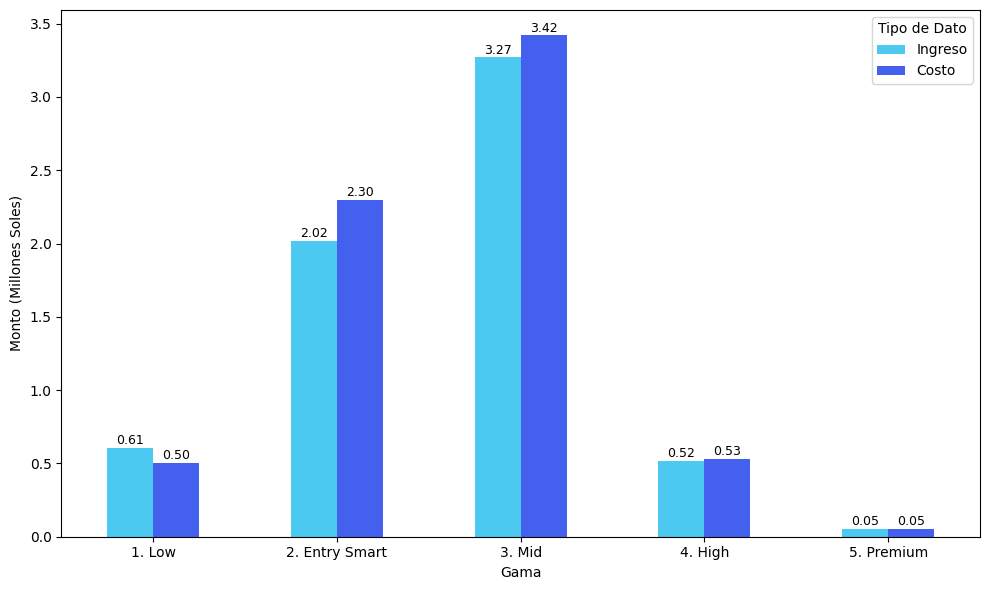

In [ ]:
gama_ingresos_costos = df.groupby('Gama')[['Ingreso', 'Costo']].sum()
gama_ingresos_costos = gama_ingresos_costos / 1000000

palette = ["#4CC9F0","#4361EE","#3A0CA3","#7209B7","#F72585","#74FC94"]
ax = gama_ingresos_costos.plot(kind='bar',
                                    figsize=(10, 6),
                                    color=palette)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.ylabel('Monto (Millones Soles)')
plt.xlabel('Gama')
plt.legend(title='Tipo de Dato')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### 6.3.1.Tabla de Ingresos, Costos, Margen y Rentabilidad por Marca, Gama y Subtipo

In [ ]:
grouped_data = df.groupby(['Marca', 'Gama', 'Subtipo'])[['Ingreso', 'Costo']].sum()
grouped_data['Margen'] = grouped_data['Ingreso'] - grouped_data['Costo']
grouped_data['Rentabilidad'] = (grouped_data['Margen'] / grouped_data['Ingreso']) * 100
grouped_data = grouped_data[grouped_data['Rentabilidad'] > 0]
grouped_data = grouped_data.sort_values(by='Rentabilidad', ascending=False)
grouped_data

,,,Ingreso,Costo,Margen,Rentabilidad
Marca,Gama,Subtipo,,,,
Azumi,1. Low,Smartphone,3810.76,2322.23,1488.53,39.061237
Bmobile,1. Low,Smartphone,261185.74,163515.49,97670.25,37.394940
EKS,1. Low,Feature,1954.16,1398.50,555.66,28.434724
Huawei,3. Mid,Smartphone,804.24,592.00,212.24,26.390132
Alcatel,1. Low,Feature,726.97,545.34,181.63,24.984525
Bmobile,1. Low,Feature,8005.49,7041.97,963.52,12.035740
Motorola,5. Premium,Smartphone,2880.51,2551.18,329.33,11.433045
Xiaomi,5. Premium,Smartphone,8517.62,7956.80,560.82,6.584234
Realme,3. Mid,Smartphone,16968.04,15867.24,1100.80,6.487491


### 6.4.Evaluación de las ganancias por Canal de Venta

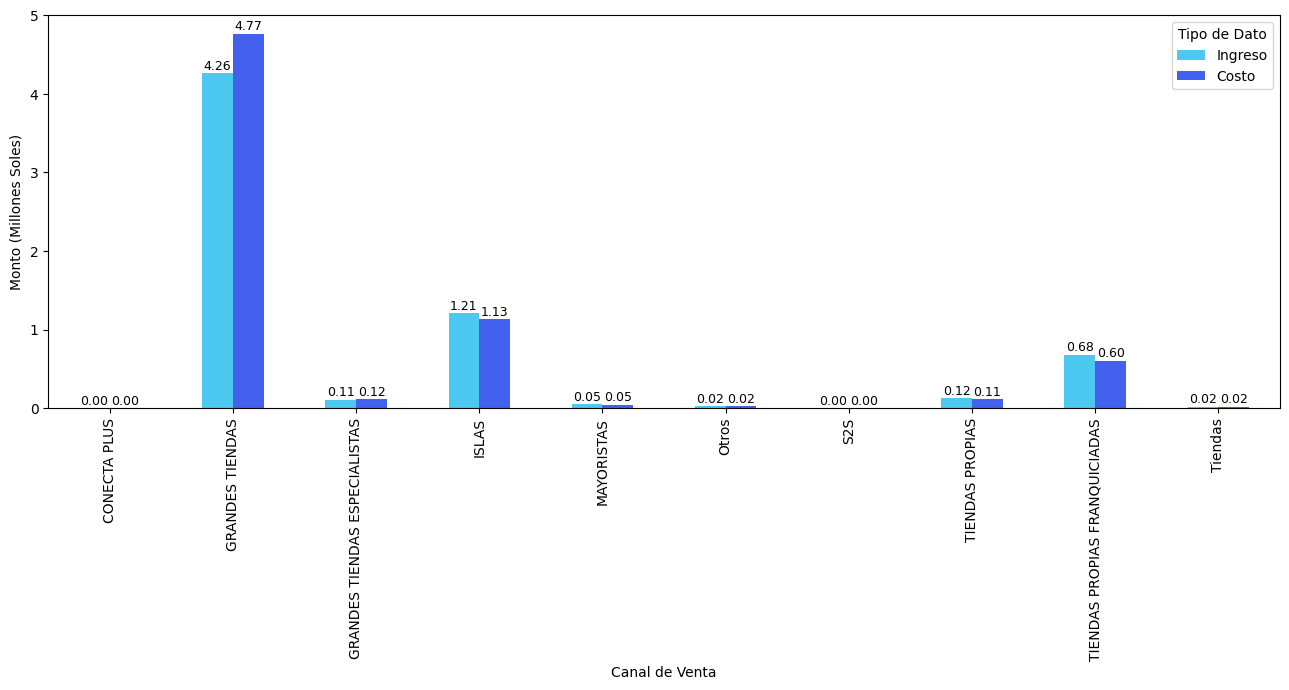

In [ ]:
canal_ingresos_costos = df.groupby('CanalVenta')[['Ingreso', 'Costo']].sum()
canal_ingresos_costos = canal_ingresos_costos / 1000000

palette = ["#4CC9F0","#4361EE","#3A0CA3","#7209B7","#F72585","#74FC94"]
ax = canal_ingresos_costos.plot(kind='bar',
                                    figsize=(13, 7),
                                    color=palette)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.ylabel('Monto (Millones Soles)')
plt.xlabel('Canal de Venta')
plt.legend(title='Tipo de Dato')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### 6.4.1.Tabla de Ingresos, Costos, Margen y Rentabilidad por Canal Venta y Canal

In [ ]:
grouped_data = df.groupby(['CanalVenta', 'Canal'])[['Ingreso', 'Costo']].sum()
grouped_data['Margen'] = grouped_data['Ingreso'] - grouped_data['Costo']
grouped_data['Rentabilidad'] = (grouped_data['Margen'] / grouped_data['Ingreso']) * 100
grouped_data = grouped_data[grouped_data['Rentabilidad'] > 0]
grouped_data = grouped_data.sort_values(by='Rentabilidad', ascending=False)
grouped_data

,,Ingreso,Costo,Margen,Rentabilidad
CanalVenta,Canal,,,,
S2S,Otros,58.47,35.13,23.34,39.917907
TIENDAS PROPIAS FRANQUICIADAS,Tiendas,679534.00,602840.45,76693.55,11.286198
TIENDAS PROPIAS,Tiendas,122693.94,111461.12,11232.82,9.155155
Otros,Otros,22503.23,20793.71,1709.52,7.596776
ISLAS,ISLAS,1205652.13,1130297.96,75354.17,6.250076
MAYORISTAS,Otros,46731.59,45357.01,1374.58,2.941436
Tiendas,Tiendas,19182.13,18901.14,280.99,1.464853


### 6.5.Evaluación de las ganancias por Localidad

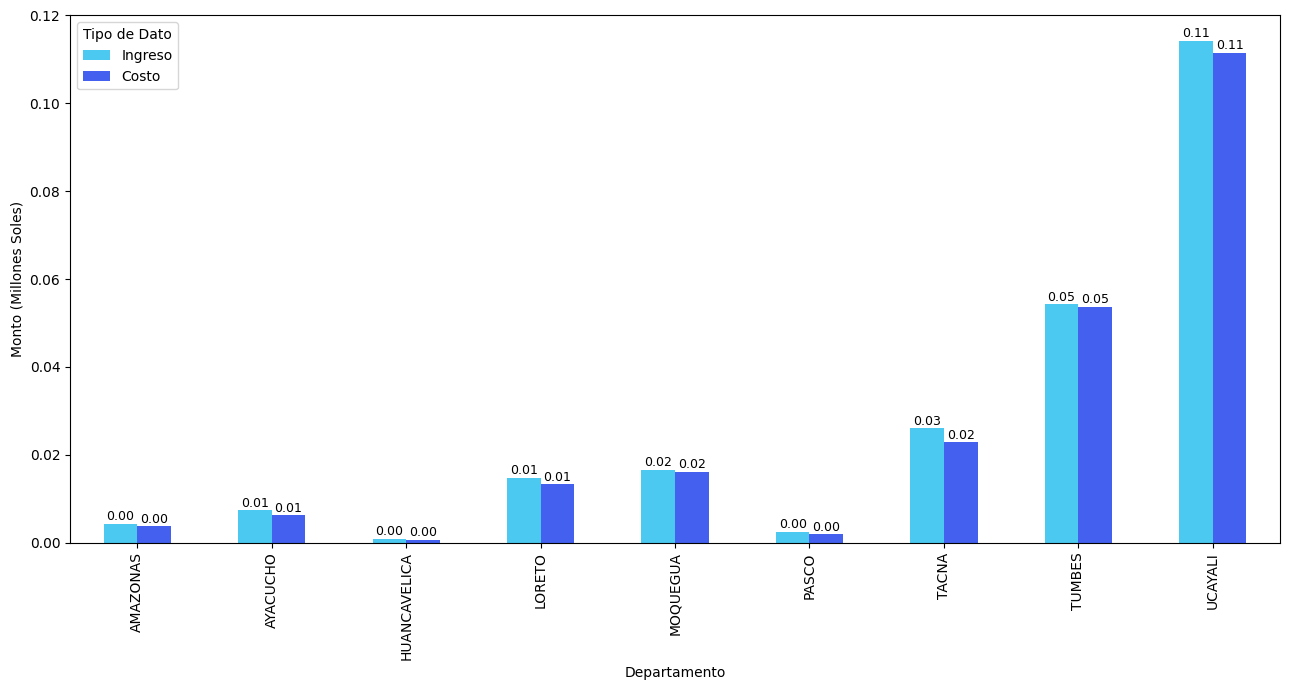

In [ ]:
depart_ingresos_costos = df.groupby('Departamento')[['Ingreso', 'Costo']].sum()
depart_ingresos_costos = depart_ingresos_costos / 1000000
depart_ingresos_costos = depart_ingresos_costos[depart_ingresos_costos['Ingreso'] > depart_ingresos_costos['Costo']]

palette = ["#4CC9F0","#4361EE","#3A0CA3","#7209B7","#F72585","#74FC94"]
ax = depart_ingresos_costos.plot(kind='bar',
                                    figsize=(13, 7),
                                    color=palette)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.ylabel('Monto (Millones Soles)')
plt.xlabel('Departamento')
plt.legend(title='Tipo de Dato')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### 6.5.1.Tabla de de Ingresos, Costos, Margen y Rentabilidad por Departamento y Cluster

In [ ]:
grouped_data = df.groupby(['Departamento', 'Cluster'])[['Ingreso', 'Costo']].sum()
grouped_data['Margen'] = grouped_data['Ingreso'] - grouped_data['Costo']
grouped_data['Rentabilidad'] = (grouped_data['Margen'] / grouped_data['Ingreso']) * 100
grouped_data = grouped_data[grouped_data['Rentabilidad'] > 0]
grouped_data = grouped_data.sort_values(by='Rentabilidad', ascending=False)
grouped_data

,,Ingreso,Costo,Margen,Rentabilidad
Departamento,Cluster,,,,
HUANCAVELICA,Cluster C,899.29,633.28,266.01,29.580002
PASCO,Cluster C,2503.37,1982.88,520.49,20.791573
AYACUCHO,Cluster C,7381.33,6216.91,1164.42,15.775206
AMAZONAS,Cluster C,4366.06,3731.83,634.23,14.526369
TACNA,Cluster C,26118.59,22893.17,3225.42,12.349135
LORETO,Cluster C,14764.60,13294.29,1470.31,9.958346
MOQUEGUA,Cluster C,16658.61,16167.92,490.69,2.945564
UCAYALI,Cluster C,114296.45,111512.69,2783.76,2.435561
TUMBES,Cluster B,54310.73,53748.14,562.59,1.035873


Comentario 4.

*   La evaluación del comportamiento de los ingresos y costos generó una alerta para la evaluación más profunda de los mismos por tipo de venta, características de los equipos, canales de venta y localidad, ya que solo durante los días 23, 24, 25 y 26 se observó un pequeño incremento de los ingresos sobre los costos (gráfico 6.1).
*   El gráfico 6.2 confirma que la empresa de Telecomunicaciones Opaco presenta una situación económica de riesgo, tal es el caso que la Venta Regular de equipos (VR) es el único tipo de venta que ha presentado un balance positivo (ingresos mayores a los costos), con un margen de ganancia de 0.06 Millones de Soles y rentabilidad de 9.80%.
*   El gráfico 6.3 muestra que en el período en estudio, la única gama con ganancias es la Low (+0.11 Millones de Soles)
*   La tabla agrupada 6.3.1 por características de los equipos (Marca, Gama y Subtipo) confirma que los tres primeros lugares de rentabilidad más alta pertenecen a la Gama Low, en primer lugar el Smartphone Azumi con una rentabilidad de 39.06%, en segundo lugar el Smartphone Bmobile con una rentabilidad de 37.39% y en tercer lugar el Feature EKS con una rentabilidad de 28.43%.
*   La rentabilidad más baja fue de 0.65% y le corresponde al Smartphone Xiaomi de Gama Mid. Todas los demás equipos que no se encuentran en la mencionada tabla 6.3.1, presentan rentabilidades menores a cero.
*   El gráfico 6.4 muestra que los unicos dos canales de venta con relación positiva (0.08 Millones de Soles) entre ingresos y costos fueron Islas y Tiendas Propias Franquiciadas, siendo está última la que posee mayor rentabilidad (11.28%) y que pertenece al canal Tiendas de acuerdo a la tabla agrupada 6.4.1.
*   Los departamentos con relación positiva entre ingresos y costos fueron: Amazonas, Ayacucho, Huancavelica, Loreto, Moquegua, Pasco, Tacna, Tumbes y Ucayali, el resto de departamento presenta rentabilidades negativas (ver gráfica 6.5).
*   De los 9 departamentos con rentabilidades positivas, 8 pertenecen al Cluster C y Huancavelica resultó ser el departamento con mayor rentabilidad (29.58%) y, el departamento con menor rentabilidad (1.03%) fue Tumbes perteneciente al Cluster B (ver tabla 6.5.1).





### 6.6.Evaluación de la rentabilidad por Departamento y Marca

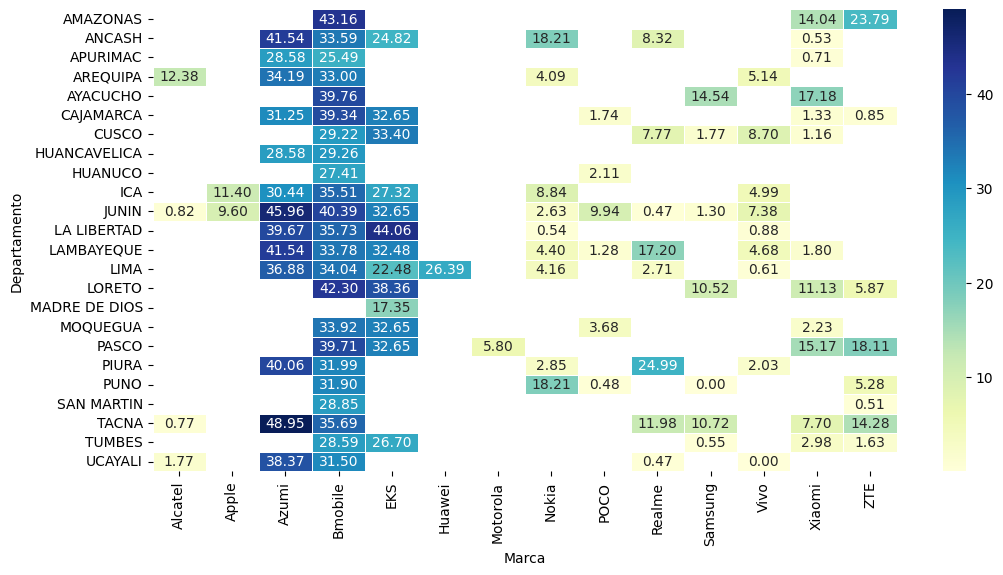

In [ ]:
renta_depart_marca = df.groupby(['Departamento', 'Marca'])['Rentabilidad'].mean().reset_index()
renta_depart_marca = renta_depart_marca[renta_depart_marca['Rentabilidad'] > 0]
heatmap_data = renta_depart_marca.pivot(index='Departamento', columns='Marca', values='Rentabilidad')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data,
            annot=True,
            fmt=".2f",
            cmap="YlGnBu",
            linewidths=.5)
plt.xlabel('Marca')
plt.ylabel('Departamento')
plt.show()

### 6.7.Evaluación del margen por departamento y canal de venta

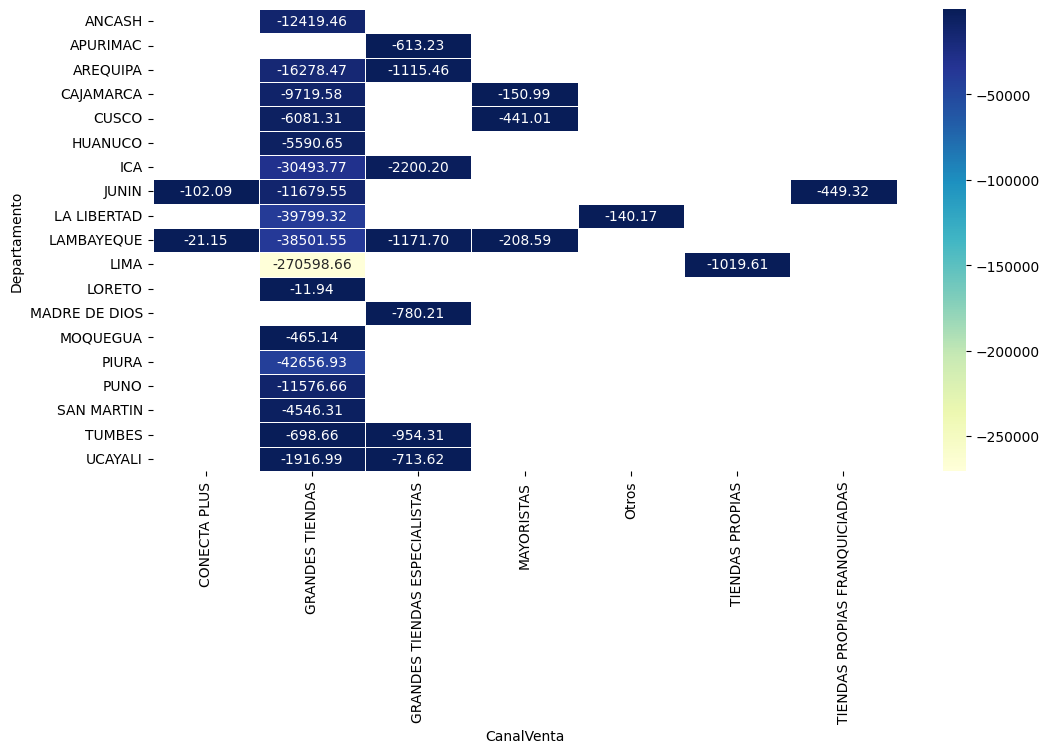

In [ ]:
margen_depart_canal = df.groupby(['Departamento', 'CanalVenta'])['Margen'].sum().reset_index()
margen_depart_canal = margen_depart_canal[margen_depart_canal['Margen'] < 0]
heatmap_data = margen_depart_canal.pivot(index='Departamento', columns='CanalVenta', values='Margen')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data,
            annot=True,
            fmt=".2f",
            cmap="YlGnBu",
            linewidths=.5)
plt.xlabel('CanalVenta')
plt.ylabel('Departamento')
plt.show()

Comentario 5. Cruzando información relevante.

*   Las Marcas que presentan mayores rentabilidad promedio en todos los departamentos de Perú son Azumi, Bmobile y EKS. Siendo Azumi la marca con mayor rentabilidad promedio (48.95%) en el departamento de Tacna, como se muestra en el gráfico 6.6.
*   El canal de venta que presentó las mayores perdidas o mayor margen negativo es el de Grandes Tiendas, siendo Lima el peor margen con -270598.66 Soles (ver gráfico 6.7).



## 7.Conclusiones

1.   Situación Financiera Crítica: La empresa enfrenta un entorno financiero complicado, evidenciado por márgenes y rentabilidades negativos. El margen promedio de -17.71 y la rentabilidad promedio de -2.12 indican que los costos superan a los ingresos, lo que requiere una revisión urgente de la estrategia comercial.
2.   Desigualdad en Ingresos: La variabilidad significativa en los ingresos y costos, reflejada en la desviación estándar, sugiere que hay grandes diferencias entre los registros de ventas. La mediana de 298.97 Soles, junto con el sesgo positivo en la distribución de ingresos, indica que un pequeño número de ventas altas están influyendo en el promedio, mientras que la mayoría se concentra en ingresos bajos.
3.   Dependencia de Gamas de Bajo Costo: Más del 95% de las ventas se concentran en las gamas de celulares Low, Entry Smart y Mid, lo que limita el potencial de rentabilidad. Esto sugiere que la empresa debería reconsiderar su enfoque hacia productos de gama más alta, dado que estos son responsables de los ingresos atípicos, aunque la mayoría de las ventas son de gama baja.
4.   Riesgo en Tipos de Venta: El análisis de los tipos de venta muestra que la Venta Regular es el único segmento que presenta un balance positivo en ingresos y costos. Esto indica que otros tipos de venta, especialmente aquellos relacionados con los productos de gama alta, no están siendo rentables, lo que podría ser un área crítica para la reestructuración.
5.   Desempeño Regional Desigual: La concentración de ventas en el departamento de Lima, que representa más del 50% de las ventas totales, sugiere que la empresa podría estar dependiendo excesivamente de un solo mercado. Sin embargo, algunos departamentos (como Huancavelica y Tacna) muestran rentabilidades positivas, lo que podría indicar oportunidades de expansión o mejora en otras regiones.
6.   Rentabilidad por Marca y Canal: La rentabilidad más alta se encuentra en marcas de gama baja, lo que indica que la empresa debe analizar su oferta de productos y ajustar su estrategia de marketing y ventas. Además, los canales de venta que tienen mejores márgenes son Islas y Tiendas Propias Franquiciadas, mientras que el canal de Grandes Tiendas reporta las mayores pérdidas, sugiriendo la necesidad de revisión en las estrategias de distribución.